# Random Forest Classifier 

## Content   <a name="content"></a>

1. [Load data](#1)
2. [ML with all features. Choosing the algorithm](#2)
3. [ML with all features. Random Forest Classfier](#3)
4. [Comparison between three methods that determine the feature importance](#4)
5. [Hyper-parameter tuning of the model with the reduced features](#5)
6. [Cross validation of the model with the reduces number of features](#6)
7. [Confusion matrix and classification report](#7)
8. [Check for overfitting](#8)
9. [Demo](#9)

In [1]:
# pip install pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn

## Load data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df = pd.read_csv('data_classification_smote.csv', index_col=[0])

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (80000, 60)


,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,368.800000,88.60000,23.600000,26,2,5,4,1,13.289000,13.289000,20.206999,20.173380,13.270500,13.270500,19.970187,19.780050,0.000000,8.479069e-07,15.378200,16.866800,19.916482,19.920059,3.929500,6.735800,19.869724,19.913633,1.136000,2.039100,20.087497,19.999420,14.232982,20.225124,20.009694,20.160073,0.460000,0.330000,0.080000,0.00,0.100000,0.0,0.03,0.0,58.630000,3.550000,13.020000,0.00,15.190000,0.0,9.61,0.0,21.001394,21.001394,3.913526,2.504053,13.537148,8.271688,3.459067,3.303320,20.038000,0
1,295.420000,56.10000,22.100000,21,1,5,6,1,9.093200,9.093200,20.309773,20.537098,7.355600,8.706400,19.933201,19.794523,0.397608,5.965835e-03,8.953200,11.017900,20.208448,20.157139,5.151400,8.508900,19.131807,19.104402,2.620800,4.793900,20.139217,19.875655,226.937038,21.115617,20.440515,21.735681,0.320000,0.580000,0.040000,0.00,0.060000,0.0,0.00,0.0,65.050000,9.890000,10.830000,0.00,14.220000,0.0,0.00,0.0,21.236228,21.044427,1.738013,1.294868,3.416209,2.298317,1.965583,1.774943,20.172000,1
2,359.720000,124.00000,22.800000,25,3,6,3,1,5.164700,5.879200,20.117038,20.106689,3.744500,5.237000,20.282373,20.073115,1.343509,1.884032e-02,6.774200,10.037800,20.216707,20.059618,4.790400,6.687400,20.432539,20.297717,3.322600,5.892700,20.306460,20.068212,253.179509,21.368984,22.752948,20.697953,0.460000,0.290000,0.140000,0.00,0.090000,0.0,0.03,0.0,53.420000,2.800000,22.240000,0.00,11.680000,0.0,9.85,0.0,21.379276,21.122627,1.414120,1.501002,2.038825,1.643843,1.441762,1.134862,20.057000,1
3,269.062816,62.67557,22.974957,20,1,3,3,1,9.695578,9.804992,19.957332,20.147524,7.851844,7.851844,19.789031,19.877973,0.000114,9.803752e-07,9.955766,12.008641,19.544943,19.576523,4.718819,6.621161,19.720562,19.678255,3.290092,4.957196,20.583557,20.289635,42.303575,20.135498,20.283813,20.221916,0.435026,0.439948,0.052504,0.00,0.062522,0.0,0.00,0.0,70.296132,6.076408,11.895095,0.00,11.732365,0.0,0.00,0.0,21.248106,21.260424,2.113848,1.816709,3.517045,2.569302,1.685318,1.426084,20.087974,1
4,423.500000,99.10000,24.400000,31,0,6,4,1,16.771900,16.771900,20.200991,19.806822,7.621600,8.387300,20.222631,20.011237,0.013190,2.151354e-03,14.784000,16.779600,19.881522,20.105641,6.741300,8.169200,20.428438,20.352171,2.701600,4.365200,20.343555,20.209945,22.471931,20.029933,20.058672,20.061696,0.480000,0.350000,0.000000,0.02,0.150000,0.0,0.00,0.0,65.230000,4.050000,0.000000,7.57,23.150000,0.0,0.00,0.0,22.200575,21.999678,2.193049,2.054008,5.472313,3.843948,2.495299,1.871438,20.048000,1


In [3]:
df.describe(include="all")

,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,364.328895,88.403125,23.030279,25.380875,1.153650,5.045375,4.896700,1.0,10.788768,11.302231,20.027918,20.026361,9.330245,9.841825,19.975148,19.992661,5.786449,0.033290,11.409605,13.376040,20.004195,20.005384,5.703859,7.653866,19.996436,19.997886,3.023202,4.834027,20.000101,19.999376,57.242918,20.315334,20.405889,20.396657,0.413457,0.425558,0.066192,0.015187,0.068669,0.001318,0.004607,0.004825,60.908565,5.364116,12.752890,5.551079,11.583234,1.001894,1.757141,1.078937,21.379160,21.319929,2.242055,1.845131,84.923331,24.002913,41.264759,15.583500,20.057546,0.500000
std,78.332666,32.569584,1.271355,5.540248,0.893953,1.804379,2.248692,0.0,3.650870,3.576236,0.307633,0.283310,3.634944,3.528586,0.371698,0.325190,195.679342,0.571091,2.803674,2.750978,0.313767,0.282749,1.825208,1.741233,0.444334,0.322584,1.283235,1.380887,0.540332,0.335901,71.725541,1.076695,5.586164,5.511120,0.042848,0.057797,0.036318,0.018326,0.034563,0.006699,0.012700,0.016658,8.484565,1.349450,6.630072,6.333185,5.459371,4.667369,4.529736,3.515275,0.849006,0.692674,1.025890,0.595334,843.936233,391.778640,484.327314,280.539356,0.016622,0.500003
min,70.090000,0.000000,11.800000,5.000000,0.000000,0.000000,0.000000,1.0,0.412500,1.334900,18.442165,18.786557,0.375000,0.412500,18.445190,18.725315,0.000000,0.000000,0.499900,3.694800,18.534780,18.799084,0.131600,2.221400,17.566934,18.590198,0.000100,0.000300,16.273016,14.612511,0.000000,20.000012,20.000000,20.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.096262,20.142857,0.198846,0.691939,0.596586,0.605246,0.118154,0.601724,20.000000,0.000000
25%,309.320000,66.100000,22.200000,21.000000,1.000000,4.000000,3.000000,1.0,8.125800,8.822000,19.832646,19.842528,6.720982,7.310100,19.729063,19.772760,0.000000,0.000002,9.401328,11.401275,19.809074,19.820495,4.372675,6.356400,19.716955,19.798356,2.348375,4.136527,19.727900,19.836189,25.889037,20.047907,20.042693,20.041320,0.385072,0.390000,0.040000,0.000000,0.048578,0.000000,0.000000,0.000000,55.460000,4.440000,8.240000,0.000000,7.900000,0.000000,0.000000,0.000000,20.818478,20.832661,1.511956,1.395855,2.857951,2.203915,1.446568,1.306235,20.049000,0.000000
50%,363.400000,85.800000,23.097996,25.000000,1.000000,5.000000,5.000000,1.0,10.392650,11.123653,20.019393,20.017699,9.092827,9.623600,19.977218,19.994767,0.062961,0.000149,11.199300,13.176900,20.000395,20.003553,5.647001,7.554550,19.998589,19.998968,2.876850,4.811331,20.000136,20.000088,40.028498,20.115333,20.101094,20.100661,0.410000,0.430000,0.060000,0.012778,0.060000,0.000000,0.000000,0.000000,61.250000,5.300000,12.580000,6.040000,11.020000,0.000000,0.000000,0.000000,21.159628,21.154658,1.976856,1.7220

[<a href="#content">Back to top</a>]

## ML with all features. Choosing the algorithm  <a name="2"></a>

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'], axis=1)
y = df['target']

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (64000, 59)
X_test:   (16000, 59)
y_train:  (64000,)
y_test:   (16000,)


In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0) }

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
2,RandomForest,0.744,0.761,0.720,0.740,0.744
4,XGBoost,0.742,0.771,0.698,0.732,0.742
0,SVM,0.708,0.717,0.702,0.709,0.708
3,GradientBoost,0.690,0.705,0.670,0.687,0.691
1,Decision,0.634,0.638,0.640,0.639,0.634


In [7]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
       # scoring = ['precision_macro', 'recall_macro']
        model.fit(X_train,y_train)
        scores = cross_val_score(model, X, y, cv=5)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.7436,0.0030,"[0.7448, 0.7416, 0.7488, 0.7429, 0.7401]"
4,XGBoost,0.7406,0.0031,"[0.7418, 0.7368, 0.7459, 0.7399, 0.7389]"
3,GradientBoost,0.6862,0.0032,"[0.6881, 0.6836, 0.6892, 0.6891, 0.6812]"
1,Decision,0.6379,0.0034,"[0.6428, 0.6342, 0.6395, 0.6392, 0.6338]"
0,SVM,0.5782,0.0030,"[0.5841, 0.577, 0.577, 0.5771, 0.5758]"


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="3"></a>

In [8]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.585, test: 0.585
>2, train: 0.600, test: 0.600
>3, train: 0.619, test: 0.616
>4, train: 0.630, test: 0.622
>5, train: 0.648, test: 0.640
>6, train: 0.668, test: 0.654
>7, train: 0.690, test: 0.666
>8, train: 0.713, test: 0.674
>9, train: 0.739, test: 0.682
>10, train: 0.770, test: 0.688
>11, train: 0.804, test: 0.698
>12, train: 0.844, test: 0.704
>13, train: 0.886, test: 0.710
>14, train: 0.917, test: 0.717
>15, train: 0.944, test: 0.720
>16, train: 0.966, test: 0.727
>17, train: 0.980, test: 0.729
>18, train: 0.989, test: 0.733
>19, train: 0.994, test: 0.737
>20, train: 0.997, test: 0.736


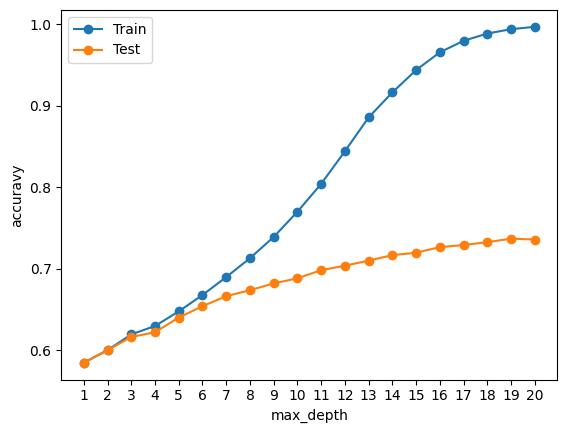

In [9]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## ML with all features. Random Forest Classfier <a name="3"></a>

In [10]:
# Instantiate the estimator 
model = RandomForestClassifier(random_state=1, max_depth=8)
#  Train the model
model.fit(X_train, y_train)
# Make a prediction
prediction = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of the model with Random forest classifier algorithm is: ", accuracy)

The accuracy of the model with Random forest classifier algorithm is:  0.6739375


[<a href="#content">Back to top</a>]